<a href="https://colab.research.google.com/github/fernandosagastume/SPLABS/blob/master/Laboratorio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout, Conv1D, MaxPooling1D, GRU

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os, re, json, functools

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [0]:
max_features = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [0]:
CLASS_NAMES = ['Positive','Negative']
NUM_CLASS = 2

In [4]:
print('train data shape:', train_data.shape)
print(train_data.shape[0], 'train samples')
print(test_data.shape[0], 'test samples')

train data shape: (25000,)
25000 train samples
25000 test samples


In [0]:
train_data = pad_sequences(train_data, maxlen = 500)
test_data = pad_sequences(test_data, maxlen=500)

In [14]:
max_len = 20000
embSize = 128
model = Sequential([
    Embedding(max_len, embSize, input_shape=(500,) ,mask_zero=False),
    Bidirectional(LSTM(32,activation='tanh')),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          2560000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,601,281
Trainable params: 2,601,281
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_data, 
          train_labels, 
          validation_data=(test_data, test_labels),
          batch_size=128,
          epochs=5
          )       

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 242s 10ms/sample - loss: 0.4920 - accuracy: 0.7710 - val_loss: 0.4376 - val_accuracy: 0.7982
Epoch 2/5
25000/25000 [==============================] - 241s 10ms/sample - loss: 0.2888 - accuracy: 0.8883 - val_loss: 0.3659 - val_accuracy: 0.8532
Epoch 3/5
25000/25000 [==============================] - 240s 10ms/sample - loss: 0.1937 - accuracy: 0.9315 - val_loss: 0.3635 - val_accuracy: 0.8639
Epoch 4/5
25000/25000 [==============================] - 238s 10ms/sample - loss: 0.1270 - accuracy: 0.9589 - val_loss: 0.3761 - val_accuracy: 0.8618
Epoch 5/5
25000/25000 [==============================] - 238s 10ms/sample - loss: 0.0992 - accuracy: 0.9681 - val_loss: 0.4514 - val_accuracy: 0.8612


In [0]:
def plot_accuracy_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(10, 10))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.setp(plt.legend().get_texts(), color='black')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1.0])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.setp(plt.legend().get_texts(), color='black')
  plt.ylabel('Cross Entropy')
  plt.ylim([0.0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

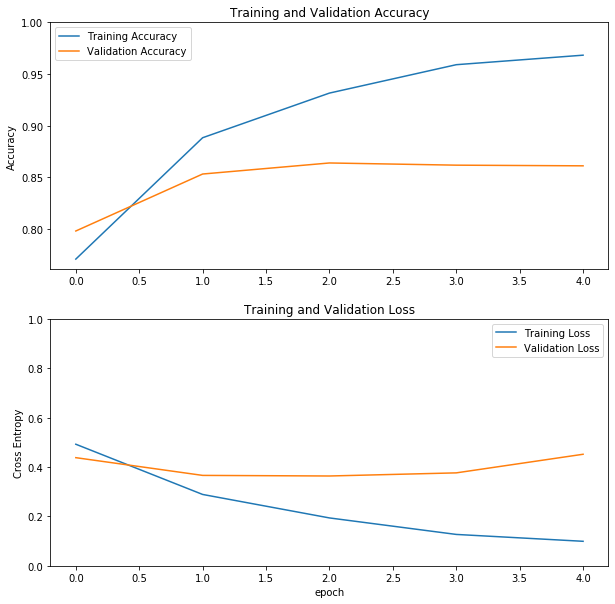

In [18]:
plot_accuracy_and_loss(history)